In [29]:
import json
import pyvis.network as network
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact

Hi

In [30]:
ep1 = open('starwars-interactions/starwars-episode-1-interactions-allCharacters.json' , 'r')
all_ep = open('starwars-interactions/starwars-full-interactions-allCharacters.json' , 'r')
data_ep1 = json.load(ep1)
data_all = json.load(all_ep)

net = network.Network(height="750px", width="100%",
 bgcolor="#222222", font_color="white",
 select_menu= True, notebook=True,
 cdn_resources='remote')

In [31]:
def create_graph(data):
    # Extract nodes and edges
    nodes = data['nodes']
    edges = data['links']

    # Prepare networkx graph
    G = nx.Graph()

    # Add nodes to the graph
    for node in nodes:
        G.add_node(node['name'], 
        value = node['value'], 
        color = node['colour'])
    # Add edges to the graph
    for edge in edges:
        G.add_edge(nodes[edge['source']]['name'], 
        nodes[edge['target']]['name'], 
        value=edge['value'])
    return G
    
def draw_graph(G, title):
    nx.draw(G, node_color=[node[1]["color"] for node in G.nodes(data=True)],
    with_labels=True)

    # Draw graph
    plt.axis('off')
    plt.title(title)

def draw_network(G, title):
    net.from_nx(G)
    net.show("a41.html")

interactive(children=(Dropdown(description='G', options={'Episode 1': <networkx.classes.graph.Graph object at …

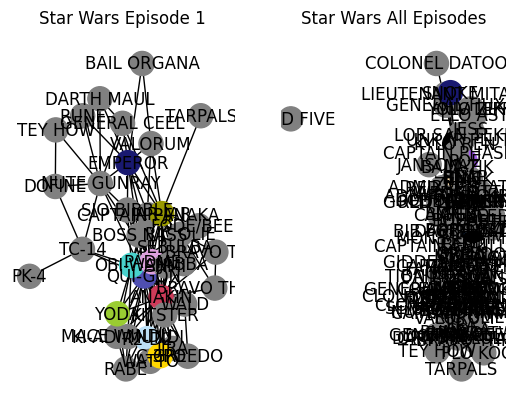

In [32]:
G_ep1 = create_graph(data_ep1)
G_all = create_graph(data_all)

interact(draw_network, G = {'Episode 1': G_ep1, 'All Episodes': G_all}, title = 'Star Wars')

plt.subplot(1, 2, 1)
draw_graph(G_ep1, 'Star Wars Episode 1')
plt.subplot(1, 2, 2)
draw_graph(G_all, 'Star Wars All Episodes')
plt.show()

